#  Deep Learning Hyper-parameters

## Regularization

In [1]:
#import the packages
import pandas as pd
import numpy as np

The data set

In [2]:
x=[-0.99768,-0.69574,-0.40373,-0.10236,0.22024,0.47742,0.82229]
y=[2.0885,1.1646,0.3287,0.46013,0.44808,0.10013,-0.32952]

input_data = pd.DataFrame(list(zip(x, y)), columns =['x', 'y']) 
print(input_data)

         x        y
0 -0.99768  2.08850
1 -0.69574  1.16460
2 -0.40373  0.32870
3 -0.10236  0.46013
4  0.22024  0.44808
5  0.47742  0.10013
6  0.82229 -0.32952


Plotting the data

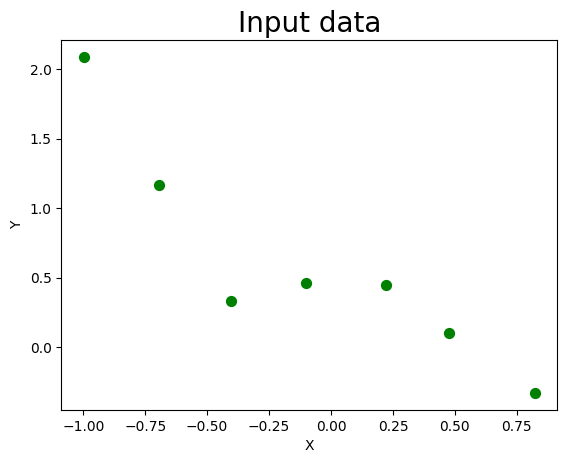

In [3]:
x = np.array(input_data.x)
y = input_data.y
#scatter plot x and y
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Input data", fontsize=20)
plt.scatter(x,y,s=50,c="g")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Usual Regression Model building - Without Regualrization

#### Simple Linear Regression

In [4]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
m1 = sm.OLS(y,x1).fit()
#SSE
print("m1 SSE", m1.ssr)

m1 SSE 0.7107401451797565


#### Second Order polynomial regression

In [5]:
x2 = sm.add_constant(np.column_stack([x,np.square(x)]))
m2 = sm.OLS(y,x2).fit()
print("m2 SSE", m2.ssr)

m2 SSE 0.457231720521299


#### Fifth order polynomial

In [6]:
x3 = sm.add_constant(np.column_stack([x, np.power(x,2),np.power(x,3),np.power(x,4),np.power(x,5)]))
m3 = sm.OLS(y,x3).fit()
print("m3 SSE", m3.ssr)

m3 SSE 0.010562888801624657


### Regression Model building - With Regularization

$W = \frac{X^T Y}{X^T X + \lambda\mathcal{I}}$

In [7]:
X = x3
y = np.array(y)
n_col = X.shape[1]
d = np.identity(n_col)
#d[0,0] = 0
w = []

reg =0 
w.append(np.linalg.lstsq(X.T.dot(X) + reg * d, X.T.dot(y), rcond=None)[0])

reg =1 
w.append(np.linalg.lstsq(X.T.dot(X) + reg * d, X.T.dot(y), rcond=None)[0])


reg =10 
w.append(np.linalg.lstsq(X.T.dot(X) + reg * d, X.T.dot(y), rcond=None)[0])


In [8]:
print("Regularized weights  lambda=0 \n", w[0])
print("Regularized weights  lambda=1 \n", w[1])
print("Regularized weights  lambda=10 \n", w[2])

Regularized weights  lambda=0 
 [ 0.47252877  0.68135289 -1.38012842 -5.97768747  2.44173268  4.73711433]
Regularized weights  lambda=1 
 [ 0.32420734 -0.42038506  0.18913816 -0.39534166  0.19724892 -0.33585404]
Regularized weights  lambda=10 
 [ 0.19897772 -0.19090381  0.12498296 -0.15875908  0.11434571 -0.13996978]


In [9]:
#new weights and older weights
print("Regularized Weights With lambda = 0 \n", list(w[0]))
print("Standard Weights With inbuilt package \n",list(m3.params))

Regularized Weights With lambda = 0 
 [np.float64(0.47252877287434636), np.float64(0.6813528948568022), np.float64(-1.3801284186125333), np.float64(-5.977687467469881), np.float64(2.4417326847935144), np.float64(4.737114334831721)]
Standard Weights With inbuilt package 
 [0.47252877287433986, 0.6813528948567635, -1.380128418612453, -5.9776874674696785, 2.441732684793398, 4.737114334831514]


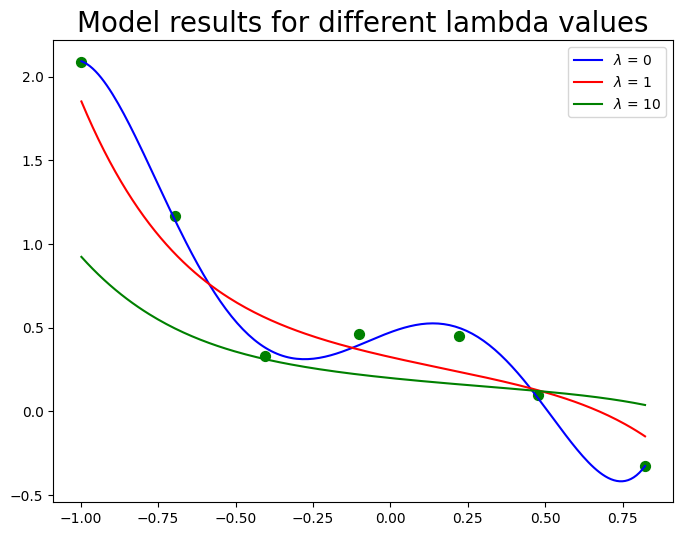

In [10]:
#ploat all these three models
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Model results for different lambda values', fontsize=20)
plt.scatter(x,y, s = 50, c = "g")
x_new = np.linspace(x.min(), x.max(), 200)
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[0]), 5))(x_new),label='$\lambda$ = 0', c = "b")
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[1]), 5))(x_new),label='$\lambda$ = 1', c = "r")
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[2]), 5))(x_new),label='$\lambda$ = 10', c = "g")
plt.legend(loc='upper right');
plt.show()

#### Choosing the regularization λ

In [11]:
#weights
print("Final Weights \n", w[1])
#perdiction
pred = X.dot(w[1])
##SSE
SSE_Final = sum(np.square(y-pred))
print("Final SSE ", SSE_Final)

Final Weights 
 [ 0.32420734 -0.42038506  0.18913816 -0.39534166  0.19724892 -0.33585404]
Final SSE  0.24456632548942078


## Regularization in Keras

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
## MNIST data The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


## Model without Regularization 

In [15]:
model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8084 - loss: 0.7060
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9410 - loss: 0.1921
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9627 - loss: 0.1212
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9713 - loss: 0.0937
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9785 - loss: 0.0717
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9827 - loss: 0.0565
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9845 - loss: 0.0478
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0401
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9902 - loss: 0.0318
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9915 - loss: 0.0287


In [17]:
#Final Results
loss, acc = model.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

1875/1875 - 3s - 1ms/step - accuracy: 0.9934 - loss: 0.0229
Train Accuracy: 99.34%
313/313 - 1s - 2ms/step - accuracy: 0.9791 - loss: 0.0721
Test Accuracy: 97.91%


## Model with Regularization 

In [18]:
from tensorflow.keras import regularizers
model_r = keras.Sequential()
model_r.add(layers.Input(shape=(784,)))
model_r.add(layers.Dense(256, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
model_r.add(layers.Dense(128, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))
model_r.add(layers.Dense(10, activation='softmax'))
model_r.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras import regularizers
model_r_h = keras.Sequential()
model_r_h.add(layers.Input(shape=(784,)))
model_r_h.add(layers.Dense(256, activation='sigmoid', kernel_regularizer=regularizers.l2(1)))
model_r_h.add(layers.Dense(128, activation='sigmoid',kernel_regularizer=regularizers.l2(1)))
model_r_h.add(layers.Dense(10, activation='softmax'))
model_r_h.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
from tensorflow.keras import regularizers
model_r_10 = keras.Sequential()
model_r_10.add(layers.Input(shape=(784,)))
model_r_10.add(layers.Dense(256, activation='sigmoid', kernel_regularizer=regularizers.l2(10)))
model_r_10.add(layers.Dense(128, activation='sigmoid',kernel_regularizer=regularizers.l2(10)))
model_r_10.add(layers.Dense(10, activation='softmax'))
model_r_10.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import regularizers
model_e_4 = keras.Sequential()
model_e_4.add(layers.Input(shape=(784,)))
model_e_4.add(layers.Dense(256, activation='sigmoid', kernel_regularizer=regularizers.l2(1e-4)))
model_e_4.add(layers.Dense(128, activation='sigmoid',kernel_regularizer=regularizers.l2(1e-4)))
model_e_4.add(layers.Dense(10, activation='softmax'))
model_e_4.summary()

In [ ]:
model_r.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_r.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5688 - loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7362 - loss: 1.3770
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7577 - loss: 1.2641
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7701 - loss: 1.2078
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7904 - loss: 1.1462
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7972 - loss: 1.1062
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8021 - loss: 1.0763
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8032 - loss: 1.0560
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8118 - loss: 1.0235
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8170 - loss: 0.9971


In [38]:
model_r_h.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_r_h.fit(x_train, y_train,epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1016 - loss: 2.3702
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1038 - loss: 2.3670
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0979 - loss: 2.3677
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1060 - loss: 2.3661
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1023 - loss: 2.3650
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1059 - loss: 2.3654
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1064 - loss: 2.3642
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1067 - loss: 2.3642
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1040 - loss: 2.3643
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1069 - loss: 2.3636
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1038 - loss: 2.3635
Epoch 12/50
1875/1875 ━━━━

In [39]:
model_r_10.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_r_10.fit(x_train, y_train,epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.1038 - loss: 2.3698
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1043 - loss: 2.3665
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1056 - loss: 2.3666
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1046 - loss: 2.3657
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1042 - loss: 2.3659
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1032 - loss: 2.3640
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1002 - loss: 2.3652
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1056 - loss: 2.3647
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1018 - loss: 2.3635
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1061 - loss: 2.3643
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1063 - loss: 2.3630
Epoch 12/50
1875/1875 ━━━━━

In [ ]:
model_e_4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_e_4.fit(x_train, y_train,epochs=50)

In [ ]:
#Final Results
loss, acc = model_e_4.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model_e_4.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

In [20]:
#Final Results
loss, acc = model_r.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model_r.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

1875/1875 - 4s - 2ms/step - accuracy: 0.8400 - loss: 0.9537
Train Accuracy: 84.00%
313/313 - 1s - 2ms/step - accuracy: 0.8446 - loss: 0.9372
Test Accuracy: 84.46%


In [41]:
#Final Results
loss, acc = model_r_h.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model_r_h.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

1875/1875 - 2s - 1ms/step - accuracy: 0.0986 - loss: 2.3581
Train Accuracy:  9.86%
313/313 - 1s - 2ms/step - accuracy: 0.0958 - loss: 2.3582
Test Accuracy:  9.58%


In [42]:
#Final Results
loss, acc = model_r_10.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model_r_10.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

ValueError: You must call `compile()` before using the model.

In [30]:
m1_layers = model.layers[2].get_weights()[0]
mr_layers = model_r.layers[2].get_weights()[0]
diff = np.abs(m1_layers - mr_layers)

In [31]:
diff

array([[1.1144129 , 1.5616108 , 0.9228416 , ..., 0.5228345 , 0.143694  ,
        0.50005543],
       [0.6767063 , 1.0288363 , 0.12791961, ..., 1.0344279 , 0.87687576,
        0.30534524],
       [0.9380021 , 0.10527325, 1.137237  , ..., 1.0142872 , 1.3824369 ,
        0.04489934],
       ...,
       [0.17622727, 0.2092988 , 0.5790317 , ..., 1.4438257 , 0.31973928,
        1.3432    ],
       [1.018149  , 1.2918465 , 1.3634695 , ..., 1.3985801 , 0.20159554,
        0.6360339 ],
       [0.09416935, 1.5597892 , 1.2964377 , ..., 1.1381452 , 0.42688003,
        0.4573704 ]], dtype=float32)

## Model with Dropout 

In [43]:
from tensorflow.keras.layers import Dropout, Input
model_rd = keras.Sequential()

model_rd.add(layers.Input(shape=(784,)))
model_rd.add(layers.Dense(256, activation='sigmoid'))
model_rd.add(Dropout(0.7))

model_rd.add(layers.Dense(128, activation='sigmoid'))
model_rd.add(Dropout(0.6))

model_rd.add(layers.Dense(10, activation='softmax'))
model_rd.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model_rd.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_rd.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5552 - loss: 1.3021
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8626 - loss: 0.4693
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8878 - loss: 0.3936
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9002 - loss: 0.3583
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9078 - loss: 0.3295
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9149 - loss: 0.3106
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9198 - loss: 0.2930
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9233 - loss: 0.2855
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9247 - loss: 0.2831
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9293 - loss: 0.2716


In [45]:
#Final Results
loss, acc = model_rd.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model_rd.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

1875/1875 - 2s - 1ms/step - accuracy: 0.9611 - loss: 0.1435
Train Accuracy: 96.11%
313/313 - 1s - 2ms/step - accuracy: 0.9592 - loss: 0.1538
Test Accuracy: 95.92%


## Early Stopping

Early stopping is not regularizer

In [60]:
model_re = keras.Sequential()
model_re.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model_re.add(layers.Dense(128, activation='sigmoid'))
model_re.add(layers.Dense(10, activation='softmax'))
model_re.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
import os
print(os.getcwd())

c:\Gokul\Github Repos\GenAI_AUKBC\6. Neural Networks


In [67]:
model_re.compile(loss='categorical_crossentropy', metrics=['accuracy'])
#Enable saving checkpoints
# Checkpoint the weights when validation accuracy improves
from tensorflow.keras.callbacks import ModelCheckpoint

# checkpoint
#dont forget to create a directory to store the checkpoints:"early_stopping_checkpoints"
j = os.getcwd()
checkpoint = ModelCheckpoint(j+r"/epoch-{epoch:02d}.keras")
model_re.fit(x_train, y_train,epochs=10,validation_data=(x_test, y_test),callbacks=[checkpoint])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9431 - loss: 0.1892 - val_accuracy: 0.9611 - val_loss: 0.1325
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9616 - loss: 0.1264 - val_accuracy: 0.9636 - val_loss: 0.1171
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9732 - loss: 0.0888 - val_accuracy: 0.9708 - val_loss: 0.0965
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9774 - loss: 0.0750 - val_accuracy: 0.9746 - val_loss: 0.0786
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9822 - loss: 0.0564 - val_accuracy: 0.9706 - val_loss: 0.0903
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9854 - loss: 0.0493 - val_accuracy: 0.9772 - val_loss: 0.0729
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9869 - loss: 0.0401 - val_accuracy: 0.9780 - val_loss: 0.0704
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9903 - loss: 0.03

In [68]:
pwd

'c:\\Gokul\\Github Repos\\GenAI_AUKBC\\6. Neural Networks'

In [71]:
model_re.load_weights(r"epoch-07.keras")# change the file name to the epoch you want to load

In [72]:
# model_re = keras.Sequential()
# model_re.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
# model_re.add(layers.Dense(128, activation='sigmoid'))
# model_re.add(layers.Dense(10, activation='softmax'))

model_re.compile(loss='categorical_crossentropy', metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              min_delta=0.01,
                              patience=2)

#train the model with call back method
model_re.fit(x_train, y_train, epochs=30,validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.9791 - val_loss: 0.0701
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9920 - loss: 0.0270 - val_accuracy: 0.9811 - val_loss: 0.0694
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0222 - val_accuracy: 0.9778 - val_loss: 0.0814


## Activation Functions

In [73]:
model2 = keras.Sequential()
model2.add(layers.Dense(15, activation='sigmoid', input_shape=(784,)))
model2.add(layers.Dense(15, activation='relu'))
model2.add(layers.Dense(15, activation='tanh'))
model2.add(layers.Dense(15, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 15)             │        11,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,655 (49.43 KB)

 Trainable params: 12,655 (49.43 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5944 - loss: 1.2076
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9061 - loss: 0.3262
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9284 - loss: 0.2477
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9374 - loss: 0.2224
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9430 - loss: 0.1963
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9462 - loss: 0.1872
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9498 - loss: 0.1775
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9521 - loss: 0.1676
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9529 - loss: 0.1593
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9537 - loss: 0.1590


## Learning Rate

In [75]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#High Learning Rate
opt_new = tf.keras.optimizers.SGD(learning_rate=10.)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1243 - loss: 2.4544
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3386 - loss: 1.8444
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5339 - loss: 1.4014
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5891 - loss: 1.2759
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6616 - loss: 1.0984
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7173 - loss: 1.0023
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7194 - loss: 0.9748
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7535 - loss: 0.9218
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7761 - loss: 0.8256
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8057 - loss: 0.7613
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7929 - loss: 0.7708
Epoch 12/20
1875/1875 ━━━━━━━

In [76]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#Low learning rate
opt_new = tf.keras.optimizers.SGD(learning_rate=0.00001)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0992 - loss: 2.4396
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0995 - loss: 2.4360
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0986 - loss: 2.4341
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1001 - loss: 2.4297
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0983 - loss: 2.4265
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0996 - loss: 2.4241
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0986 - loss: 2.4217
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0985 - loss: 2.4159
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0985 - loss: 2.4125
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0972 - loss: 2.4143
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1003 - loss: 2.4096
Epoch 12/20
1875/1875 ━━━━━━━━

In [77]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#Optimal learning rate
opt_new = tf.keras.optimizers.SGD(learning_rate=0.01)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1714 - loss: 2.2852
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4712 - loss: 2.1018
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5376 - loss: 1.7147
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6640 - loss: 1.3274
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7421 - loss: 1.0843
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7866 - loss: 0.9124
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8145 - loss: 0.7866
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8354 - loss: 0.6907
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8543 - loss: 0.6129
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8634 - loss: 0.5620
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8740 - loss: 0.5073
Epoch 12/20
1875/1875 ━━━━━━━━

## Momentum

In [78]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#Optimal learning rate
opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2491 - loss: 2.2414
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6164 - loss: 1.5962
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7566 - loss: 0.9904
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8233 - loss: 0.7274
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8572 - loss: 0.5799
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8726 - loss: 0.4930
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8851 - loss: 0.4353
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8939 - loss: 0.3942
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9010 - loss: 0.3658
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9050 - loss: 0.3420
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9081 - loss: 0.3291
Epoch 12/20
1875/1875 ━━━━━━━━

## Mini batch Gradient Descent

In [79]:
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(20, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()


opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Batch size=fll data(GD)
model4.fit(x_train, y_train,batch_size=x_train.shape[0], epochs=50)

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step - accuracy: 0.0993 - loss: 2.4198
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.1146 - loss: 2.3888
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.1437 - loss: 2.3684
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.1597 - loss: 2.3525
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.1684 - loss: 2.3391
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.1734 - loss: 2.3275
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.1762 - loss: 2.3170
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.1784 - loss: 2.3074
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.1795 - loss: 2.2985
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.1805 - loss: 2.2902
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.1811 - loss: 2.2823
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.1816 - lo

In [80]:
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(20, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()


opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Batch size=1 (SGD)
model4.fit(x_train, y_train,batch_size=1, epochs=2)

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 88s 1ms/step - accuracy: 0.7779 - loss: 0.7544
Epoch 2/2
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 103s 2ms/step - accuracy: 0.9167 - loss: 0.3378


In [81]:
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(20, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()


opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Batch size = 512
model4.fit(x_train, y_train,batch_size=512, epochs=10)

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1875 - loss: 2.2474
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6159 - loss: 1.7314
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7064 - loss: 1.3248
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7702 - loss: 1.0178
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8283 - loss: 0.7901
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8624 - loss: 0.6341
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8808 - loss: 0.5262
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8905 - loss: 0.4522
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8993 - loss: 0.3966
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9058 - loss: 0.3580
